<a href="https://colab.research.google.com/github/Hamid-Ba/NYCHotel/blob/main/USHotels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hamid Balalzadeh (98405017)

Import Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import tensorflow as tf

I gathered data from https://www.kaggle.com/datasets/gdberrio/new-york-hotels.
in this dataset we have NYC Hotels Reviews.

Now We Should Preprocessing Data

In [2]:
hotel_df = pd.read_csv("/content/hotels.csv")

In [3]:
hotel_df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


Count of Hotels Reviews

In [4]:
len(hotel_df)

35912

In [5]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35912 non-null  object 
 1   categories            35912 non-null  object 
 2   city                  35912 non-null  object 
 3   country               35912 non-null  object 
 4   latitude              35826 non-null  float64
 5   longitude             35826 non-null  float64
 6   name                  35912 non-null  object 
 7   postalCode            35857 non-null  object 
 8   province              35912 non-null  object 
 9   reviews.date          35653 non-null  object 
 10  reviews.dateAdded     35912 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        35050 non-null  float64
 14  reviews.text          35890 non-null  object 
 15  reviews.title      

Dropping some columns which has **too null values** and are **unnecessary**

In [6]:
hotel_df.drop(columns=['reviews.id', 'reviews.userCity',"reviews.userProvince","reviews.doRecommend"], inplace=True)

Identifying duplicate rows

In [7]:
duplicate_rows = hotel_df.duplicated()

Dropping duplicate rows

In [8]:
cleaned_hotel_df = hotel_df[~duplicate_rows]

In [9]:
# Identifying and counting missing values
missing_values_count = cleaned_hotel_df.isnull().sum()

print(missing_values_count)

address                 0
categories              0
city                    0
country                 0
latitude               86
longitude              86
name                    0
postalCode             55
province                0
reviews.date          259
reviews.dateAdded       0
reviews.rating        862
reviews.text           22
reviews.title        1622
reviews.username       43
dtype: int64


Dropping rows with missing values

In [10]:
cleaned_hotel_df = hotel_df.dropna()

Check If We Don't miss anything ...

In [11]:
missing_values_count = cleaned_hotel_df.isnull().sum()

print(missing_values_count)

address              0
categories           0
city                 0
country              0
latitude             0
longitude            0
name                 0
postalCode           0
province             0
reviews.date         0
reviews.dateAdded    0
reviews.rating       0
reviews.text         0
reviews.title        0
reviews.username     0
dtype: int64


In [12]:
len(cleaned_hotel_df)

34016

# **Define a function to detect the language of a given text string**

Because we have other languages beside english , We Have to specify them and then remove them

In [13]:
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

In [14]:
cleaned_hotel_df['language'] = cleaned_hotel_df['reviews.text'].apply(detect_language)

<ipython-input-14-4a4fe6544c87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_hotel_df['language'] = cleaned_hotel_df['reviews.text'].apply(detect_language)


In [15]:
cleaned_hotel_df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.username,language
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,Russ (kent),en
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,A Traveler,en
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,Maud,sv
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,Julie,en
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,5.0,We stayed here for four nights in October. The...,������ ���������������,sungchul,en


In [16]:
cleaned_hotel_df = cleaned_hotel_df[cleaned_hotel_df['language']=='en'].reset_index(drop=True)

Removing the 'language' column since it's no longer needed

In [17]:
cleaned_hotel_df = cleaned_hotel_df.drop(columns=['language'])

In [18]:
len(cleaned_hotel_df)

32003

Let's **save it as preprocessed data** , thus we don't need to doing all this again.

In [19]:
cleaned_hotel_df.to_csv('/content/final_cleaned_hotel_dataset.csv', index=False)

Doing Some Visual Stuff ...

In [20]:
%matplotlib inline

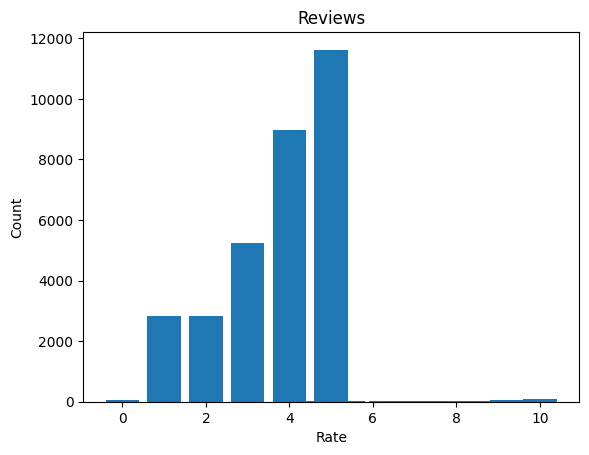

In [21]:
fig , ax = plt.subplots()

bar_data = cleaned_hotel_df["reviews.rating"].value_counts()
bar_x = bar_data.keys().tolist()
bar_y = bar_data.tolist()

ax.bar(bar_x,bar_y)
ax.set_title("Reviews")
ax.set_xlabel("Rate")
ax.set_ylabel("Count");

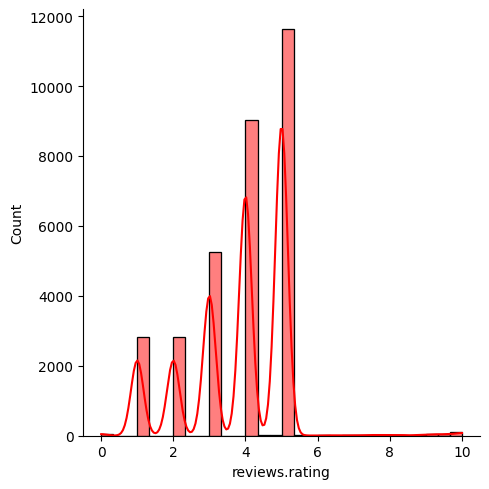

In [22]:
sns.displot(cleaned_hotel_df, x='reviews.rating', bins = 30, color = 'red',kde=True);

Here I Will Create a new Column as a Category .

**Positive** And **Negative** .

*   Positive : Thos One Which Their Rate is greater than 5.
*   Negative : Thos One Which Their Rate is lower than 5.



In [23]:
def categorize(rate):
  return "Pos" if rate >= 5 else "Neg"

In [24]:
cleaned_hotel_df["Category"] = cleaned_hotel_df["reviews.rating"].apply(categorize)

In [25]:
cleaned_hotel_df.sample(5)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.username,Category
29955,3080 E Colby St,Hotels,Whitehall,US,43.408970,-86.317420,Americas Best Value Inn,49461,MI,2015-08-29T00:00:00Z,2016-11-09T18:48:58Z,2.0,Front staff was very nice. Hotel was dirty and...,SPEND THE EXTRA MONEY,A Traveler,Neg
7358,614 S W 11th Ave,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,45.520850,-122.682800,The Governor Hotel,97205,OR,2005-05-18T00:00:00Z,2016-11-14T16:19:44Z,3.0,Having enjoyed the Governor in the past (very ...,Overbooking fiasco,moosenose,Neg
1203,18980 Upper Belmont Pl,"Conference & Convention Centers,Wholesale Copi...",Leesburg,US,39.094056,-77.485577,The National Conference Center,20176,VA,2014-08-10T00:00:00Z,2017-02-13T22:47:36Z,3.0,this place is creepy. weird tunnels and steril...,not as bad as I thoight,Professor Twain ��������������,Neg
412,375 Main St,"Hotels,Hotel",Waterville,US,44.570590,-69.640120,Best Western Plus Waterville Grand Hotel,4901,ME,2016-01-08T00:00:00Z,2016-10-27T13:17:27Z,5.0,Great place,Great room - but . . . .,Katherine,Pos
28717,2605 Weston Rd,Hotels,Fort Lauderdale,US,26.085576,-80.372269,Residence Inn By Marriott Fort Lauderdale Weston,33331,Southwest Ranches,2016-06-10T00:00:00Z,2016-11-02T01:08:53Z,4.0,Need to upgrade technology. Outlets by the bed...,Need upgrade,Gloria,Neg


In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Define a function to preprocess the reviews.text columns

In [27]:
def preprocess_text(text):
    # Remove punctuations from the text
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Lowercase all text
    text = text.lower()
    
    # Tokenize the text into words
    words = text.split()
    
    # Remove stop words from the text using NLTK corpus
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Apply stemming to the words using Porter stemmer
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Join the preprocessed words back into text and return it
    return ' '.join(words)

## Define a function to Map Pos & Neg Categories To Binaries

In [28]:
def map_label_to_binary(label):
   return 0 if label == 'Neg' else 1

**Let's make it easier**

*   We Only Need Reviews Text as X and Category as y


In [29]:
X = cleaned_hotel_df['reviews.text']
y = cleaned_hotel_df['Category']

In [30]:
X = X.apply(preprocess_text)

In [31]:
vectorizer = TfidfVectorizer(min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(X).toarray()

In [32]:
y = y.apply(map_label_to_binary)

In [33]:
len(X)

32003

In [34]:
len(y)

32003

## Split our data to Train & Test

In [35]:
train_data = X[:20000]
train_labels = y[:20000]
test_data = X[20000:]
test_labels = y[20000:]

In [36]:
train_data[0]

array([0.2136701, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ])

In [37]:
train_labels[0]

0

In [38]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Building The Model

Model definition

In [39]:
model = keras.Sequential([
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [40]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [41]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [42]:
len(partial_x_train)

10000

In [43]:
len(partial_y_train)

10000

**Training your model**

In [44]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
20/20 [==============================] - 3s 111ms/step - loss: 0.6710 - accuracy: 0.6526 - val_loss: 0.6672 - val_accuracy: 0.5987
Epoch 2/20
20/20 [==============================] - 1s 35ms/step - loss: 0.6330 - accuracy: 0.6639 - val_loss: 0.6457 - val_accuracy: 0.5987
Epoch 3/20
20/20 [==============================] - 1s 35ms/step - loss: 0.5964 - accuracy: 0.6713 - val_loss: 0.6196 - val_accuracy: 0.6132
Epoch 4/20
20/20 [==============================] - 1s 26ms/step - loss: 0.5582 - accuracy: 0.7004 - val_loss: 0.5891 - val_accuracy: 0.6587
Epoch 5/20
20/20 [==============================] - 1s 36ms/step - loss: 0.5233 - accuracy: 0.7390 - val_loss: 0.5685 - val_accuracy: 0.6747
Epoch 6/20
20/20 [==============================] - 1s 26ms/step - loss: 0.4926 - accuracy: 0.7615 - val_loss: 0.5479 - val_accuracy: 0.7028
Epoch 7/20
20/20 [==============================] - 1s 27ms/step - loss: 0.4664 - accuracy: 0.7802 - val_loss: 0.5305 - val_accuracy: 0.7289
Epoch 8/20
2

In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

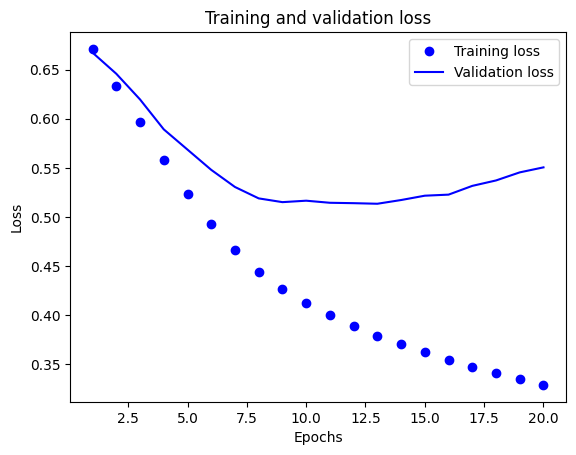

In [46]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

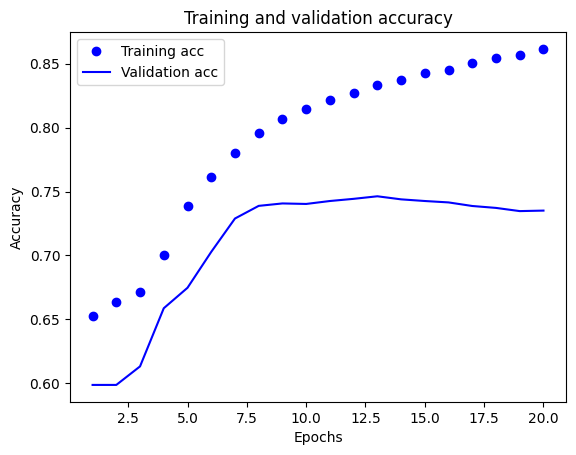

In [47]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [49]:
model = keras.Sequential([
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(train_data, y_train, epochs=4, batch_size=512)
results = model.evaluate(test_data, y_test)

Epoch 1/4
40/40 [==============================] - 3s 49ms/step - loss: 0.6718 - accuracy: 0.6237
Epoch 2/4
40/40 [==============================] - 2s 39ms/step - loss: 0.6164 - accuracy: 0.6572
Epoch 3/4
40/40 [==============================] - 1s 34ms/step - loss: 0.5549 - accuracy: 0.7273
Epoch 4/4
376/376 [==============================] - 2s 4ms/step - loss: 0.5140 - accuracy: 0.7430


In [50]:
results

[0.5139663815498352, 0.7429808974266052]

### Using a trained model to generate predictions on new data

In [51]:
model.predict(test_data)

376/376 [==============================] - 1s 3ms/step


array([[0.08581091],
       [0.52415615],
       [0.54093575],
       ...,
       [0.7394362 ],
       [0.7409046 ],
       [0.45834067]], dtype=float32)